In [1]:
#@title Install Clip
!pip install git+https://github.com/openai/CLIP.git@d50d76daa670286dd6cacf3bcd80b5e4823fc8e1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git (to revision d50d76daa670286dd6cacf3bcd80b5e4823fc8e1) to /tmp/pip-req-build-lyfy0l9x
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-lyfy0l9x
  Running command git rev-parse -q --verify 'sha^d50d76daa670286dd6cacf3bcd80b5e4823fc8e1'
  Running command git fetch -q https://github.com/openai/CLIP.git d50d76daa670286dd6cacf3bcd80b5e4823fc8e1
  Running command git checkout -q d50d76daa670286dd6cacf3bcd80b5e4823fc8e1
  Resolved https://github.com/openai/CLIP.git to commit d50d76daa670286dd6cacf3bcd80b5e4823fc8e1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 7.9 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369398 sha256=e1646914209c47d1f2ee043f6d5238c0352eac7d10180b8c6a61472434bca06b
  Stored in dir

In [2]:
#@title import Modules

import clip
import torch
from PIL import Image

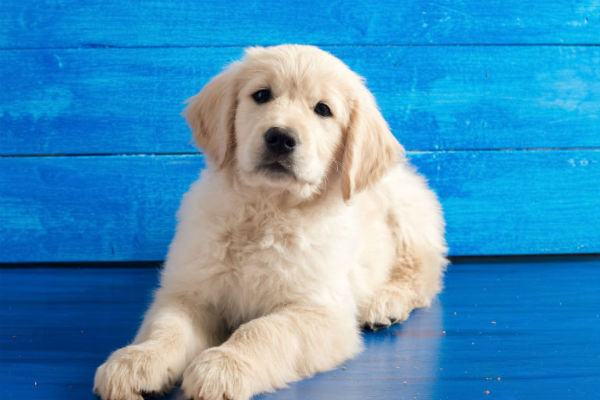

In [3]:
#load image
image = Image.open('image.jpg')
image

In [4]:
device = torch.device('cuda:0')
model, preprocess = clip.load("ViT-B/32", device=device)

100%|████████████████████████████████████████| 338M/338M [00:01<00:00, 250MiB/s]


In [5]:
image = preprocess(image).unsqueeze(0).to(device)
text = clip.tokenize(["a diagram", "a dog", "a cat"]).to(device)
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)

In [6]:
sims = torch.cosine_similarity(image_features, text_features) # Similarity for text and image
print(sims) # Can be used as a loss for minimization

tensor([0.1991, 0.2646, 0.2061], device='cuda:0', dtype=torch.float16)
